# Social Media Security
## Distributed Systems 
### Introduction

This distributed application is designed to analayze the social media security of our users. They can analyze which is the personal information that they make public in their social media accounts. Specifically, they can analyze their Facebook and Twitter accounts. The objective is raise awareness among users that they can put a lot of personal information public, and this can be a risk because the hackers can use social engineering to condition their ideologies or decisions. Even thieves can take advantage of this information to find out where you live and rob your home if you are on holidays.

This software implements serverless architecture and use IBM Cloud Functions to execute this app. Also, we used Lithops API to execute IBM Cloud Functions and store user's data in IBM Object Storage. Therefore, we use an object-oriented storage architecture.

Now, let's analyze the information produced by our application. We used the Hillary Clinton, Barack Obama and Mufti Menk (Imam) profiles to generate the analyzed data.

import emoji
import numpy as np
import os
import lithops
from lithops.storage import Storage
import numpy as np
import pandas as pd
import io
import csv
import re
import operator
import facebook
import matplotlib.pyplot as plt
import math
from nltk.text import Text  


In [7]:

import sys
try:
    import lithops
except:
    !{sys.executable} -m pip install lithops
    import lithops

In [8]:
config = {'ibm_cf':  {'endpoint' : 'https://eu-gb.functions.cloud.ibm.com',
                      'namespace'   : 'ubenabdelkrim2@gmail.com_dev',
                      'api_key'     : '7c45d3db-a61f-4ca6-afdd-45d749ebbda3:9Z1CfSBEeif85med0hgE9pefPC8KI6vrrCanErdmMKiajaMKKzfOd57TBQKF4E9I'}, 
          'ibm_cos': {'region'   : 'eu-de',
                    'access_key' : '5286a241e5de460a96de29466c635424',
                    'secret_key' : '1e4c0eaec93783aab1243240ffe8f0d90dbae5def4c9aeae'},
          'lithops' : {'storage_bucket' : 'sd-task2'}}

In [9]:
fexec = lithops.FunctionExecutor(config=config)


2021-06-20 01:06:59,862 [INFO] lithops.config -- Lithops v2.3.4
2021-06-20 01:07:00,130 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-20 01:07:00,131 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-gb - Namespace: ubenabdelkrim2@gmail.com_dev
2021-06-20 01:07:00,131 [INFO] lithops.executors -- Serverless Executor created with ID: 62e27e-0


In [10]:
storage=Storage()


2021-06-20 01:07:00,203 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de


In [11]:
def countFrequency(my_list, freq):
 
    # Creating an empty dictionary
    for item in my_list:
        if (item in freq.keys()):
            freq[item] += 1
    return freq

def political_analysis(texts):
    resultados = {}

    ###clarification: all keywords have been selected based on the frequency of their use, rather than personal opinions
    democrats_words = ["family", "care", "cut", "support", "thank", "new", "student", "need", "help", "equal pay", "fair", 
        "bin laden", "wall street", "worker", "veteran", "fight", "invest", "education", "military", "war", "medicare", "science", 
        "forward", "women", "seniors", "biden"]
    republicans_words = ["good", "security", "great", "unite", "senate", "thank", "good", "meet", "hear", "join", "government", 
        "flag", "church", "unemployment", "regulation", "obamacare", "fail", "better", "faith", "business", "small business", "romney", 
        "leadership", "god", "debt", "spending", "success"]
    democrat_dict = {}
    republican_dict = {}
    democrat_freq = 0
    republican_freq = 0

    for word in democrats_words:
        democrat_dict[word]=0
    for word in republicans_words:
        republican_dict[word]=0
    for text in texts:
        democrat_dict = countFrequency(str(text).split(" "), democrat_dict)
        republican_dict = countFrequency(str(text).split(" "), republican_dict)
    for word in democrat_dict:
        democrat_freq+=democrat_dict[word]
    for word in republican_dict:
        republican_freq+=republican_dict[word]
    
    if(democrat_freq>republican_freq):
        result= "democrat"
    else:
        if(democrat_freq<republican_freq):
            result= "republican"
   
        else:
            result = "neutral"
    resultados['politics'] = result
    return result, democrat_dict, republican_dict
    

In [12]:
def religion_analysis(texts):
    islam_words = ["allah", "fatwa", "hadj", "hajj","hijjah", "islam", "mecca", "muhammad", "mosque", "muslim", 
        "prophet", "ramadan", "salam", "salaam", "sharia", "suhoor", "sunna", "sunnah", "sunni", "koran", "coran", 
        "qur'an", "hijab", "halal", "hadith", "imam", "madrassah", "salat", "sawm", "shahada", "sura", "tafsir",
        "zakat", "kaaba", "eid al fitr","khutbah", "eid al adha", "p.b.u.h", "sheikh"]
    catholic_words = ["apostle", "assembly", "bible", "blessed sacrament", "celebrant", "discernment", "disciple", 
        "easter", "gospel", "eucharist", "grace", "communion", "holy water", "jesus", "christ", "new testament", "old testament",
        "sacrament", "catholic", "christmas", "christian", "confession", "convent", "godparent", "immaculate", "pentateuch", "saint",
        "protestant", "church", "ecclesiastic", "episcopal"]
    jewish_words = ["torah", "shalom", "kosher", "chutzpah", "kippah", "mazel tov", "adar", "achashverosh", "bimah",
        "daven", "gelilah", "hakafot", "halachah", "iyar", "kiddish", "nisan", "nine day", "shmot", "shul", "simchat",
        "vayikra", "yizkor", "zichrono livracha", "yerushalayim", "yisrael"]
    budism_words = ["ajahn chah", "advaita vedanta", "ayya khema", "bhikkhu payutto", "buddha", "buddhism", "buddhist",
        "chan", "chi kung", "dana", "dharma", "dhamma", "gelugpa", "jhana", "koan", "mahasi", "mahayana", "nibbana", 
        "nirvana", "pali", "sanskrit", "zen"]

    islam_dict = {}
    catholic_dict = {}
    jewish_dict = {}
    budism_dict = {}

    results={}
    results["catholic"]=0
    results["islam"]=0
    results["jewish"]=0
    results["budism"]=0

    for word in islam_words:
        islam_dict[word]=0
    for word in catholic_words:
        catholic_dict[word]=0
    for word in jewish_words:
        jewish_dict[word]=0
    for word in budism_words:
        budism_dict[word]=0
    
        
    for text in texts:
        islam_dict = countFrequency(str(text).split(' '), islam_dict)
        catholic_dict = countFrequency(str(text).split(' '), catholic_dict)
        jewish_dict = countFrequency(str(text).split(' '), jewish_dict)
        budism_dict = countFrequency(str(text).split(' '), budism_dict)
    for word in islam_dict:
        results["islam"]+=islam_dict[word]
    for word in catholic_dict:
        results["catholic"]+=catholic_dict[word]
    for word in jewish_dict:
        results["jewish"]+=jewish_dict[word]
    for word in budism_dict:
        results["budism"]+=budism_dict[word]

    max_value=max(results.items(), key=operator.itemgetter(1))[0]
    if (results.get(max_value) > 0):
        result= max_value
    else:
        result =  "neutral"
    return result, islam_dict, catholic_dict, jewish_dict, budism_dict

In [13]:
def split_posts_text(posts):
    posts_split = []
    for post in posts:
        post_split = post.split(',')
        if len(post_split)>4 and post_split[6] !='': 
            posts_split.append(post_split)
    return posts_split

In [14]:
def get_posts_cloud(user):
    posts = storage.get_object('sd-task2', user+"/data_crawling.csv").decode('utf8')
    return posts.split('%')
def get_posts_csv(user):
    posts = storage.get_object('sd-task2', user+"/data_crawling.csv").decode('utf8')
    posts_split = split_posts_text(get_posts_cloud(user))
    return posts_split
    
def get_results(user):
    posts_split = get_posts_csv(user)
    political_result = political_analysis(posts_split)
    democrat_dict = political_result[1]
    republican_dict = political_result[2]

    relgion_result = religion_analysis(posts_split)
    islam_dict = relgion_result[1]
    catholic_dict = relgion_result[2]
    jewish_dict = relgion_result[3]
    budism_dict = relgion_result[4]
    
    return democrat_dict, republican_dict, islam_dict, catholic_dict, jewish_dict, budism_dict


In [15]:
def dict_to_dataframe(dicts):
    df_democrat = pd.DataFrame(dicts[0].items(), columns = ["Word","FrequencyDemocrat"])
    df_republican = pd.DataFrame(dicts[1].items(), columns = ["Word","FrequencyRepublican"])
    df_islam = pd.DataFrame(dicts[2].items(), columns = ["Word","FrequencyIslam"])
    df_catholic = pd.DataFrame(dicts[3].items(), columns = ["Word","FrequencyCatholic"])
    df_jewish = pd.DataFrame(dicts[4].items(), columns = ["Word","FrequencyJewish"])
    df_budism = pd.DataFrame(dicts[5].items(), columns = ["Word","FrequencyBudism"])
    return df_democrat,df_republican,df_islam, df_catholic, df_jewish, df_budism

In [16]:
def show_basic_statistics(tweets):
    count = df['posts_text'].str.split().str.len()
    count.index = count.index.astype(str) + 'words:'
    count.sort_index(inplace=True)
    #Basic statistics
    print("Total number of words", count.sum(), "words")
    print("Mean number of words per tweet:", round(count.mean(),2), "words")
    df["tweet_length"] = df["posts_text"].str.len()
    print("Total length of the dataset is:", df.tweet_length.sum(), "chars")
    print("Mean length of a tweet is: ", round(df.tweet_length.mean(),0), "chars")

## Hillary Clinton STATISTICS

In [19]:
tables = dict_to_dataframe(get_results("HillaryClinton"))
tables[0].head(15)
df = pd.DataFrame(get_posts_cloud("HillaryClinton"), columns = ["posts_text"])
show_basic_statistics(df)

Total number of words 4771 words
Mean number of words per tweet: 32.46 words
Total length of the dataset is: 33896 chars
Mean length of a tweet is:  231.0 chars


In [552]:
tables[1].head(15)

,Word,FrequencyRepublican
0,good,1
1,security,0
2,great,6
3,unite,0
4,senate,3
5,thank,2
6,meet,0
7,hear,2
8,join,11
9,government,2


In [553]:
tables[2].head(15)

,Word,FrequencyIslam
0,allah,0
1,fatwa,0
2,hadj,0
3,hajj,0
4,hijjah,0
5,islam,0
6,mecca,0
7,muhammad,0
8,mosque,0
9,muslim,0


In [554]:
tables[3].head(15)

,Word,FrequencyCatholic
0,apostle,0
1,assembly,0
2,bible,0
3,blessed sacrament,0
4,celebrant,0
5,discernment,0
6,disciple,0
7,easter,1
8,gospel,0
9,eucharist,0


In [555]:
tables[4].head(15)

,Word,FrequencyJewish
0,torah,0
1,shalom,0
2,kosher,0
3,chutzpah,0
4,kippah,0
5,mazel tov,0
6,adar,0
7,achashverosh,0
8,bimah,0
9,daven,0


In [556]:
tables[5].head(15)

,Word,FrequencyBudism
0,ajahn chah,0
1,advaita vedanta,0
2,ayya khema,0
3,bhikkhu payutto,0
4,buddha,0
5,buddhism,0
6,buddhist,0
7,chan,0
8,chi kung,0
9,dana,0


In [557]:
def show_charts(dicts):
    figure, axis = plt.subplots(6, figsize=(15,40))
    figure.subplots_adjust(hspace=.4)

    #democrat words plot
    lists = sorted(democrat_dict.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples 
    axis[0].plot(x, y)
    axis[0].set_title("Democrat Words Frequencies")
    axis[0].tick_params(labelrotation=45)
    axis[0].set_xlabel('Words', fontsize=10)
    axis[0].set_ylabel('Freq', fontsize=10)

    #republican words plot
    lists = sorted(republican_dict.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples 
    axis[1].plot(x, y)
    axis[1].set_title("Republican Words Frequencies")
    axis[1].tick_params(labelrotation=45)
    axis[0].set_xlabel('Words', fontsize=10)
    axis[0].set_ylabel('Freq', fontsize=10)

    #islam words plot
    lists = sorted(islam_dict.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples 
    axis[2].plot(x, y)
    axis[2].set_title("Islamic Words Frequencies")
    axis[2].tick_params(labelrotation=45)
    axis[0].set_xlabel('Words', fontsize=10)
    axis[0].set_ylabel('Freq', fontsize=10)

    #catholic words plot
    lists = sorted(catholic_dict.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples 
    axis[3].plot(x, y)
    axis[3].set_title("Catholic Words Frequencies")
    axis[3].tick_params(labelrotation=45)
    axis[0].set_xlabel('Words', fontsize=10)
    axis[0].set_ylabel('Freq', fontsize=10)

    #jewish words plot
    lists = sorted(jewish_dict.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples 
    axis[4].plot(x, y)
    axis[4].set_title("Jewish Words Frequencies")
    axis[4].tick_params(labelrotation=45)
    axis[0].set_xlabel('Words', fontsize=10)
    axis[0].set_ylabel('Freq', fontsize=10)

    #budism_dict words plot
    lists = sorted(budism_dict.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples 
    axis[5].plot(x, y)
    axis[5].set_title("Budism Words Frequencies")
    axis[5].tick_params(labelrotation=45)
    axis[0].set_xlabel('Words', fontsize=10)
    axis[0].set_ylabel('Freq', fontsize=10)


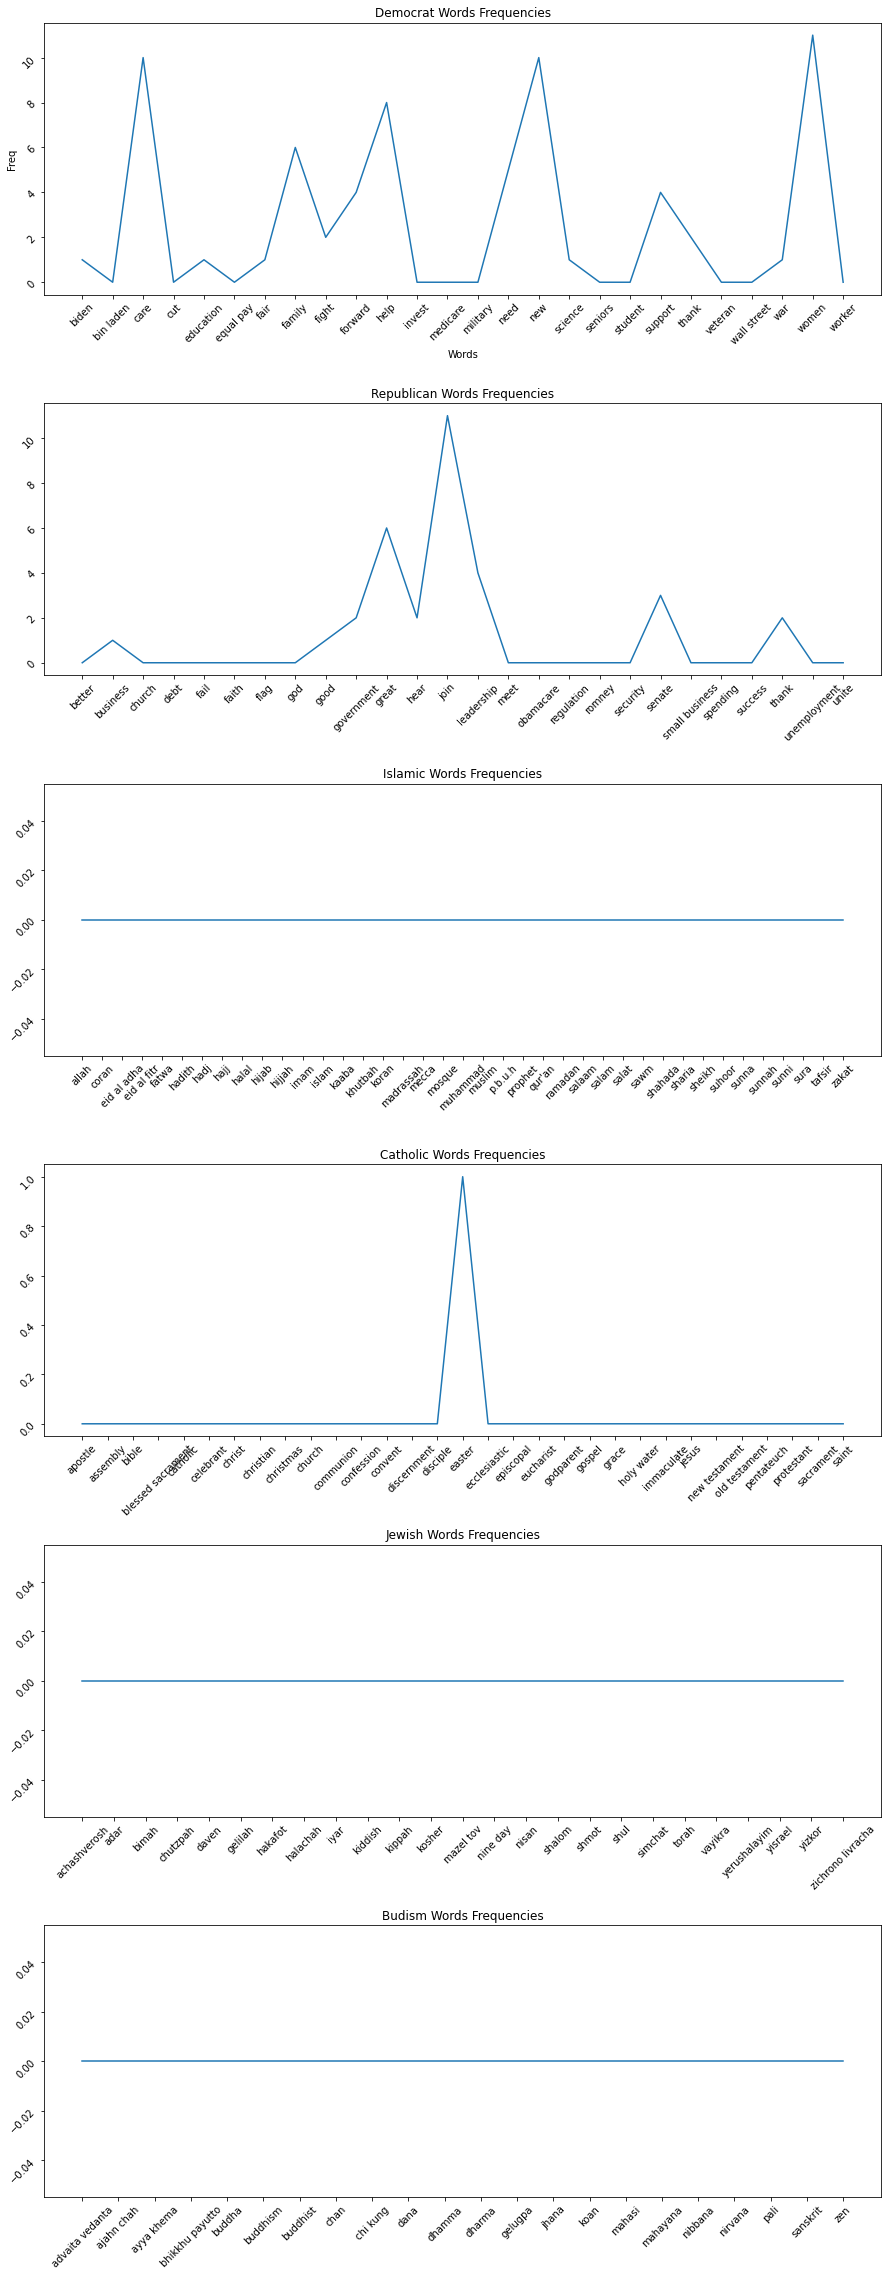

In [558]:
show_charts(get_results("HillaryClinton"))

In [559]:
def dispersion_tweets(tweets,dicts):
    tweets=str(tweets).split()
    tweets=[word.replace("'","") for word in tweets ]
    tweets=[word.replace("[", "") for word in tweets ]
    tweets=[word.replace("]","") for word in tweets ]
    tweets=[word.replace(",", "") for word in tweets ]
    tweets=Text(tweets)
    plt.subplots(figsize=(20,5))
    print("Demcorat Words")
    tweets.dispersion_plot(list(dicts[0].keys()))
    print("Republican Words")
    tweets.dispersion_plot(list(dicts[1].keys()))
    print("Islam Words")
    tweets.dispersion_plot(list(dicts[2].keys()))
    print("Catholic Words")
    tweets.dispersion_plot(list(dicts[3].keys()))
    print("Jewish Words")
    tweets.dispersion_plot(list(dicts[4].keys()))
    print("Budism Words")
    tweets.dispersion_plot(list(dicts[5].keys()))
    
    

Demcorat Words


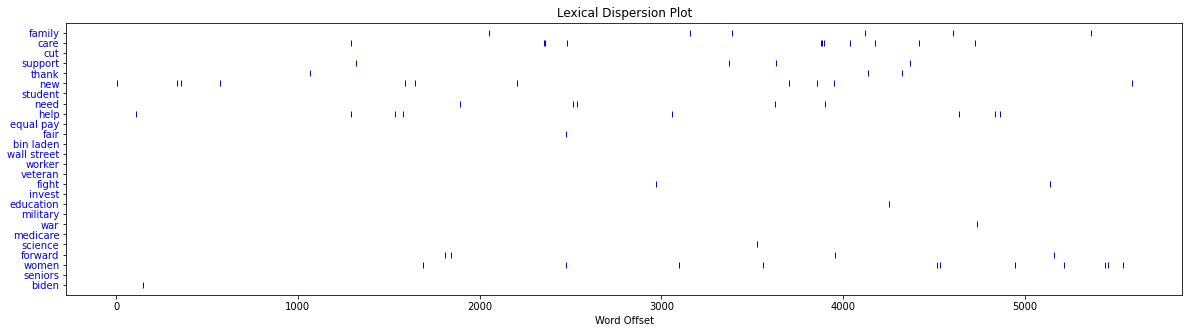

Republican Words


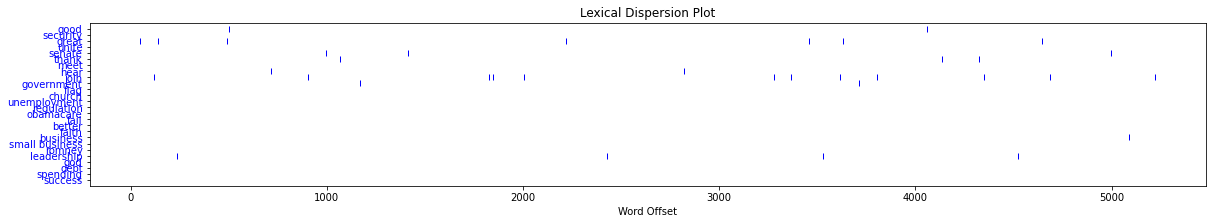

Islam Words


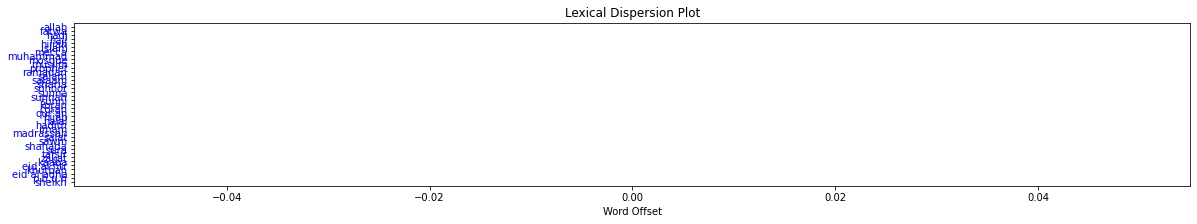

Catholic Words


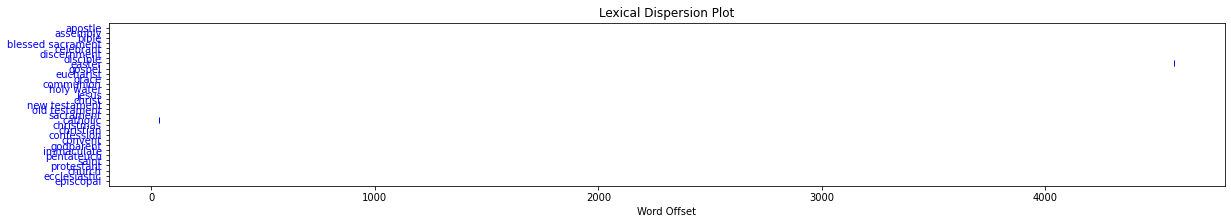

Jewish Words


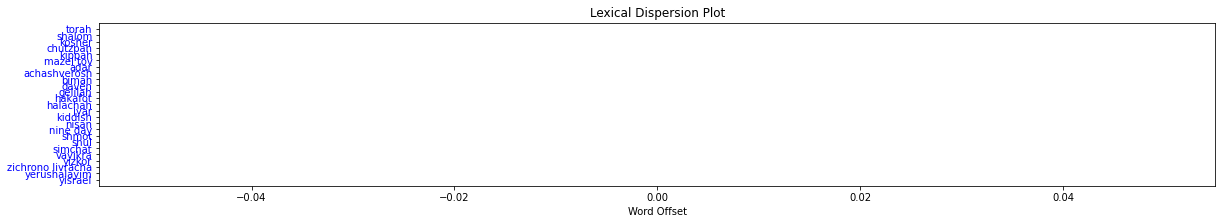

Budism Words


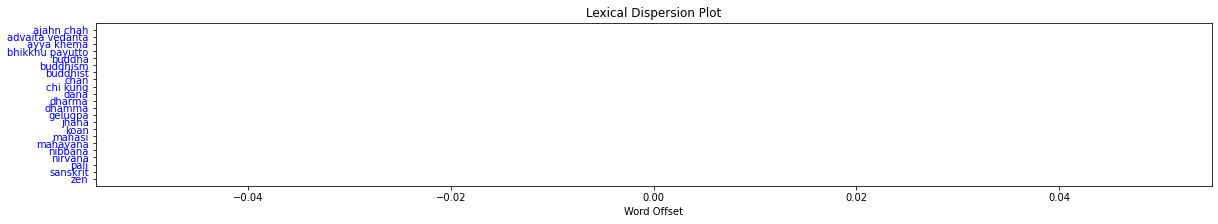

In [560]:
dispersion_tweets(get_posts_csv("HillaryClinton"), get_results("HillaryClinton"))

## Barack Obama STATISTICS

In [20]:

tables = dict_to_dataframe(get_results("BarackObama"))
tables[0].head(15)
df = pd.DataFrame(get_posts_cloud("BarackObama"), columns = ["posts_text"])
show_basic_statistics(df)

Total number of words 8250 words
Mean number of words per tweet: 43.42 words
Total length of the dataset is: 54735 chars
Mean length of a tweet is:  288.0 chars


In [563]:
tables[1].head(15)

,Word,FrequencyRepublican
0,good,12
1,security,0
2,great,12
3,unite,0
4,senate,4
5,thank,6
6,meet,0
7,hear,1
8,join,6
9,government,3


In [564]:
tables[2].head(15)

,Word,FrequencyIslam
0,allah,0
1,fatwa,0
2,hadj,0
3,hajj,0
4,hijjah,0
5,islam,0
6,mecca,0
7,muhammad,0
8,mosque,0
9,muslim,0


In [565]:
tables[3].head(15)

,Word,FrequencyCatholic
0,apostle,0
1,assembly,0
2,bible,0
3,blessed sacrament,0
4,celebrant,0
5,discernment,0
6,disciple,0
7,easter,1
8,gospel,0
9,eucharist,0


In [566]:
tables[4].head(15)

,Word,FrequencyJewish
0,torah,0
1,shalom,0
2,kosher,0
3,chutzpah,0
4,kippah,0
5,mazel tov,0
6,adar,0
7,achashverosh,0
8,bimah,0
9,daven,0


In [567]:
tables[5].head(15)

,Word,FrequencyBudism
0,ajahn chah,0
1,advaita vedanta,0
2,ayya khema,0
3,bhikkhu payutto,0
4,buddha,0
5,buddhism,0
6,buddhist,0
7,chan,0
8,chi kung,0
9,dana,0


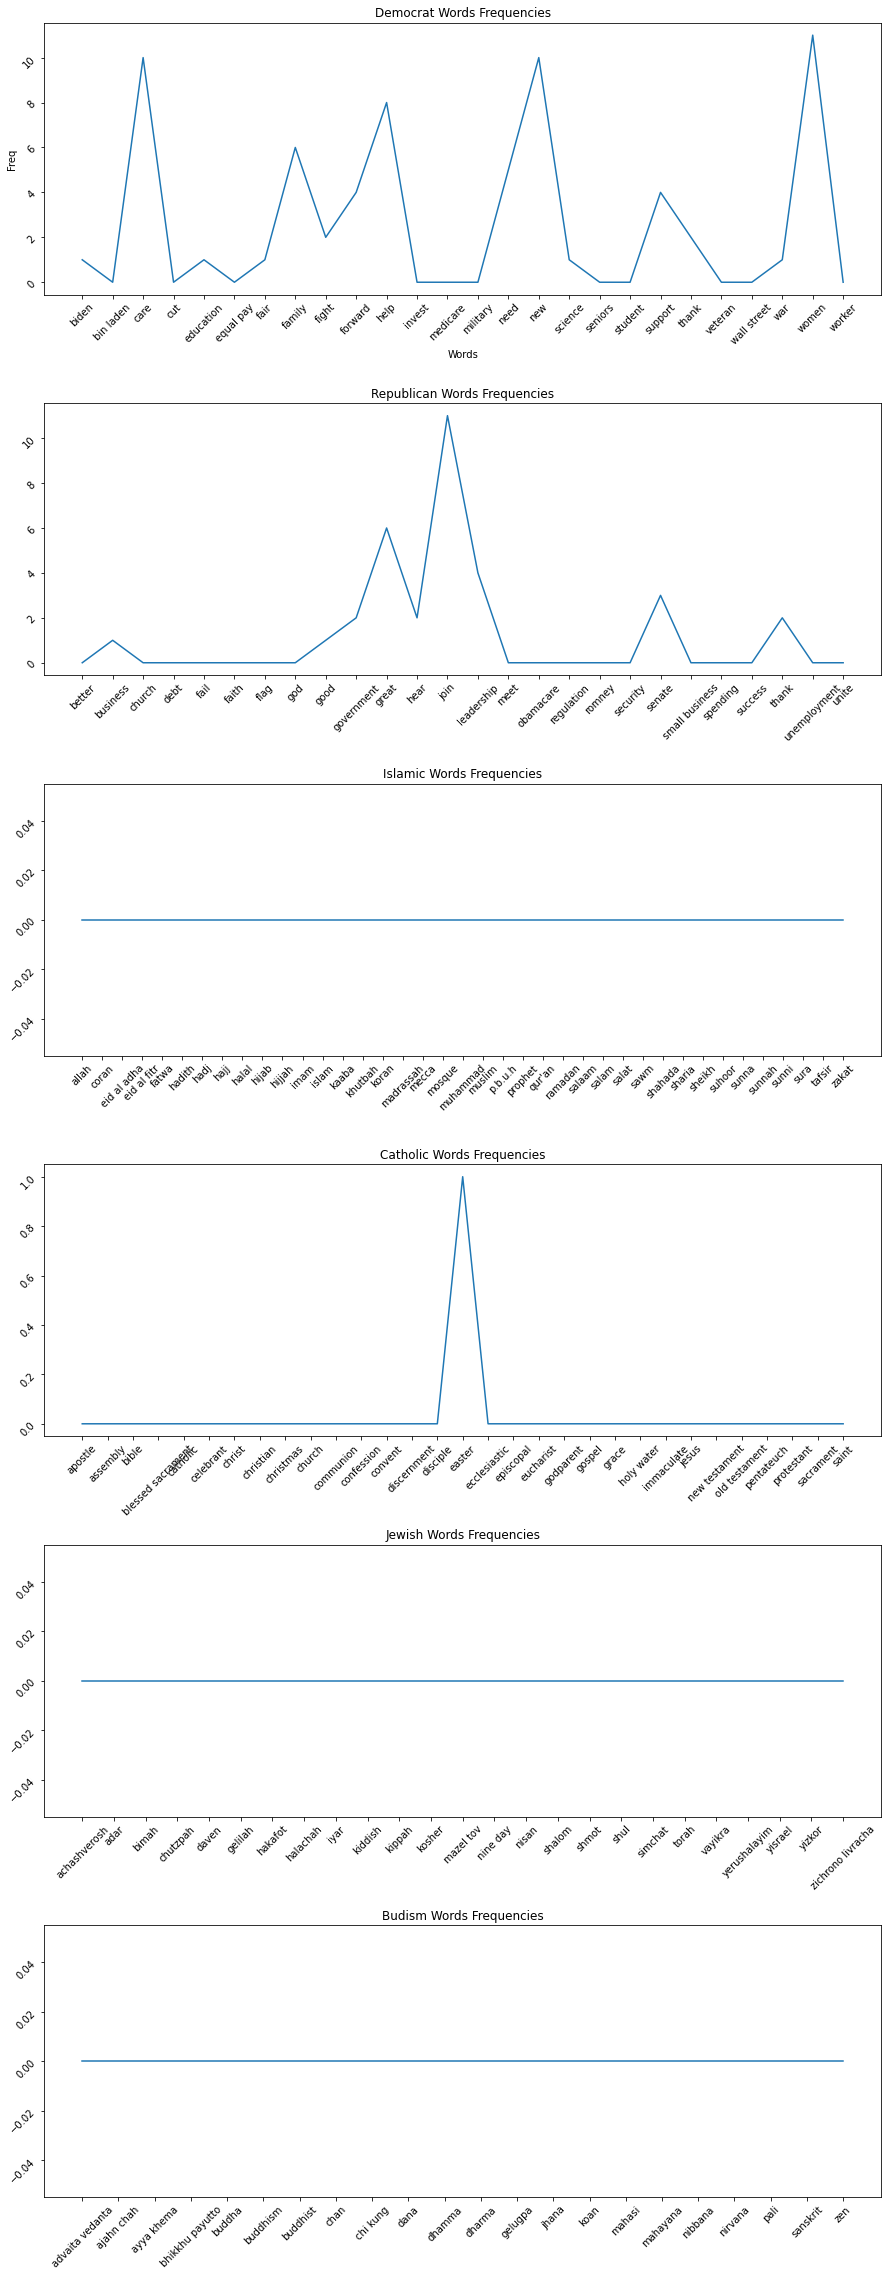

In [568]:
show_charts(get_results("BarackObama"))

Demcorat Words


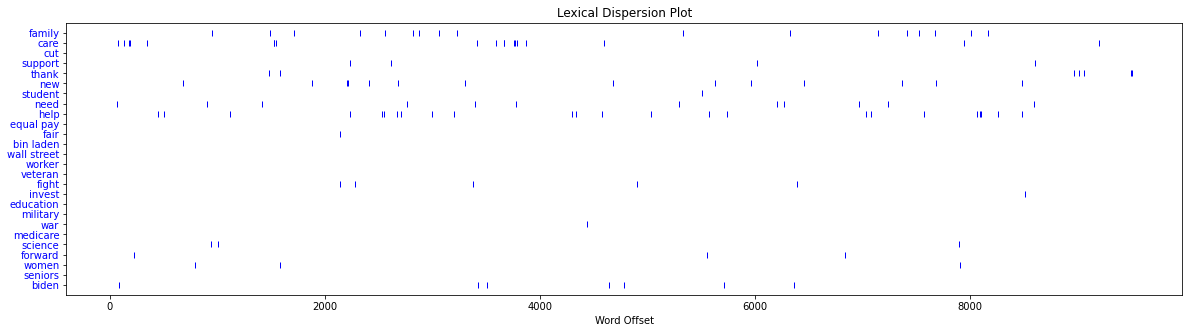

Republican Words


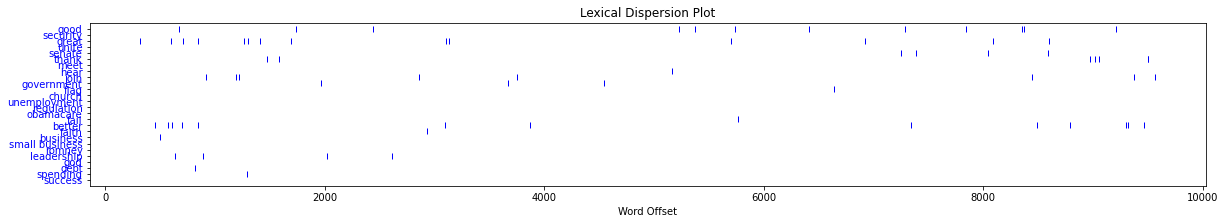

Islam Words


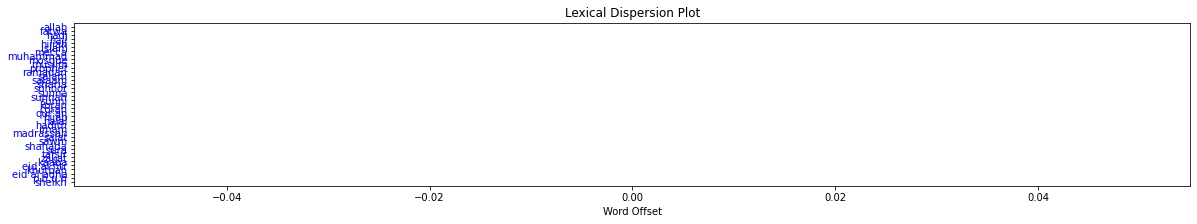

Catholic Words


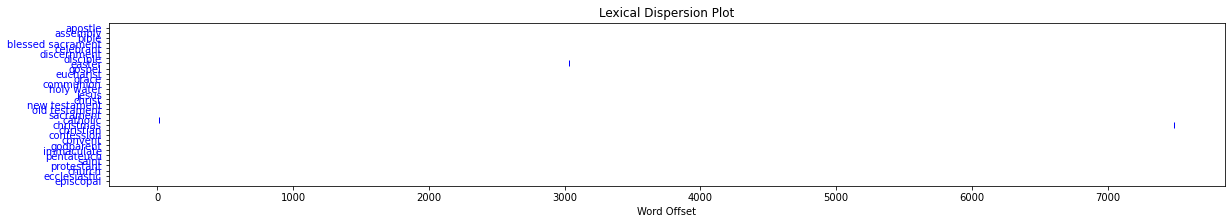

Jewish Words


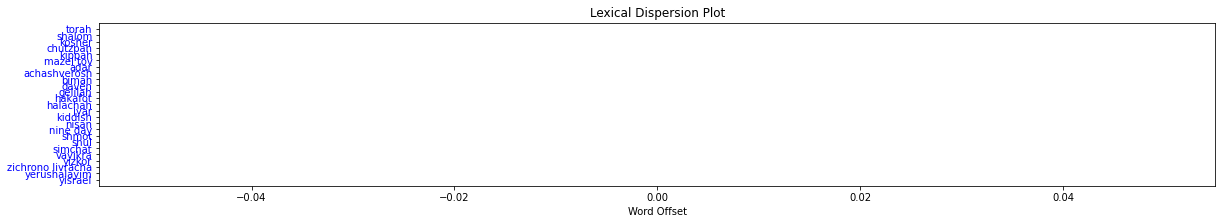

Budism Words


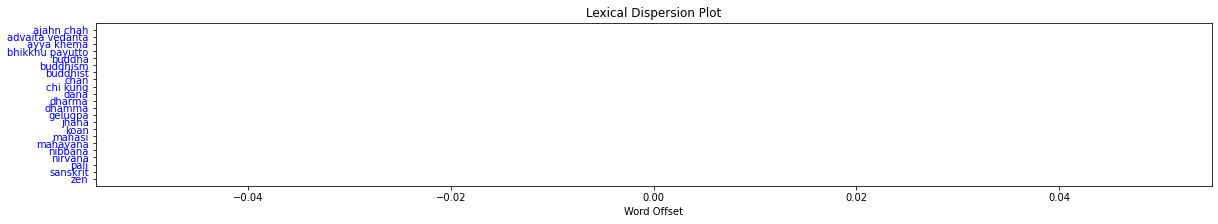

In [569]:
dispersion_tweets(get_posts_csv("BarackObama"), get_results("BarackObama"))

## Mufti Menk (Muslim Imam)

In [21]:
tables = dict_to_dataframe(get_results("muftimenk"))
tables[0].head(15)
df = pd.DataFrame(get_posts_cloud("muftimenk"), columns = ["posts_text"])
show_basic_statistics(df)

Total number of words 10910 words
Mean number of words per tweet: 54.82 words
Total length of the dataset is: 68765 chars
Mean length of a tweet is:  346.0 chars


In [572]:
tables[1].head(15)

,Word,FrequencyRepublican
0,good,32
1,security,0
2,great,2
3,unite,0
4,senate,0
5,thank,2
6,meet,0
7,hear,2
8,join,0
9,government,0


In [573]:
tables[2].head(15)

,Word,FrequencyIslam
0,allah,1
1,fatwa,0
2,hadj,0
3,hajj,0
4,hijjah,0
5,islam,0
6,mecca,0
7,muhammad,0
8,mosque,1
9,muslim,0


In [574]:
tables[3].head(15)

,Word,FrequencyCatholic
0,apostle,0
1,assembly,0
2,bible,0
3,blessed sacrament,0
4,celebrant,0
5,discernment,0
6,disciple,0
7,easter,0
8,gospel,0
9,eucharist,0


In [575]:
tables[4].head(15)

,Word,FrequencyJewish
0,torah,0
1,shalom,0
2,kosher,0
3,chutzpah,0
4,kippah,0
5,mazel tov,0
6,adar,0
7,achashverosh,0
8,bimah,0
9,daven,0


In [576]:
tables[5].head(15)

,Word,FrequencyBudism
0,ajahn chah,0
1,advaita vedanta,0
2,ayya khema,0
3,bhikkhu payutto,0
4,buddha,0
5,buddhism,0
6,buddhist,0
7,chan,0
8,chi kung,0
9,dana,0


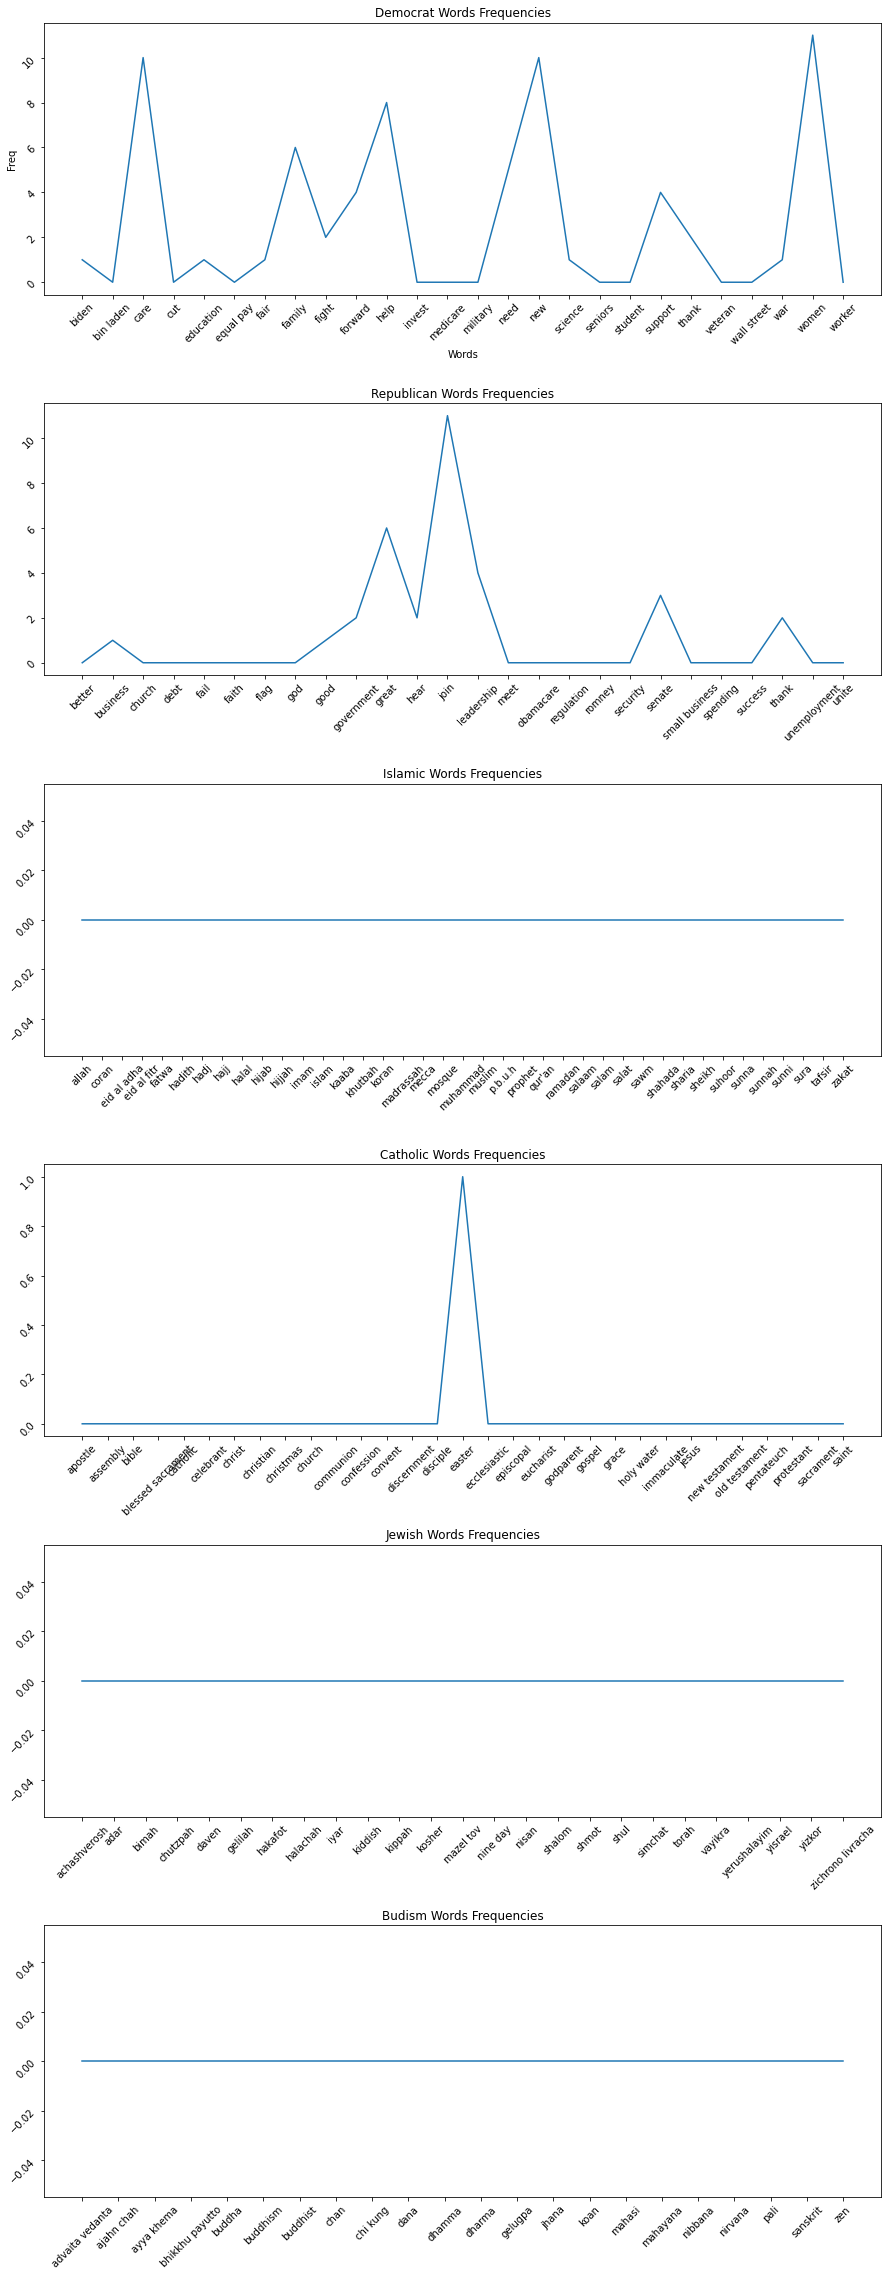

In [577]:
show_charts(get_results("muftimenk"))

Demcorat Words


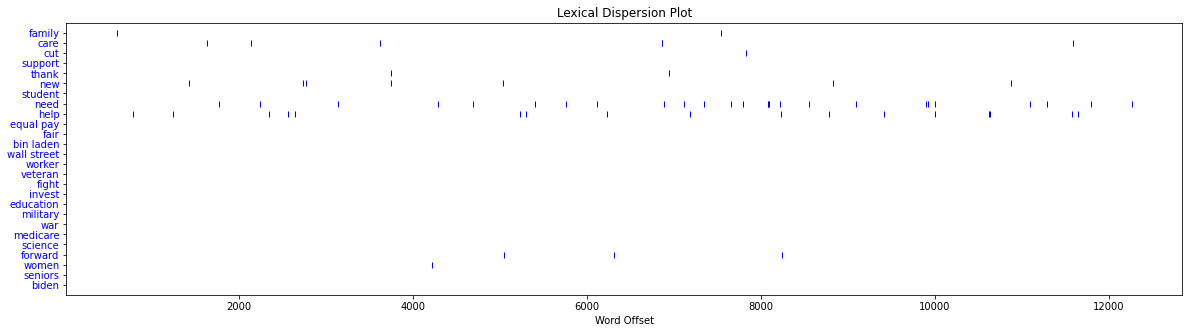

Republican Words


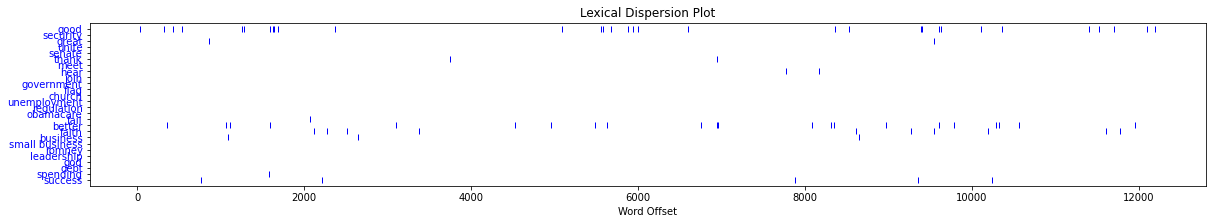

Islam Words


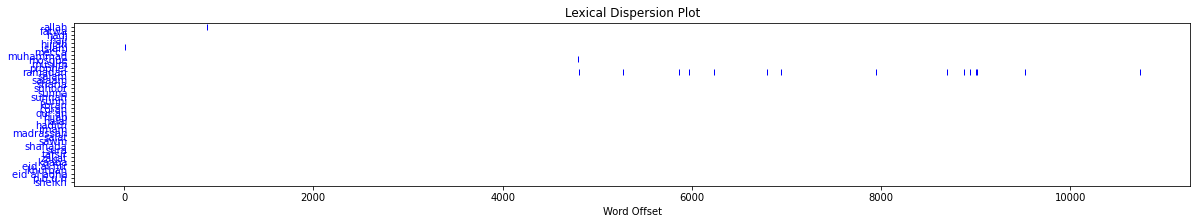

Catholic Words


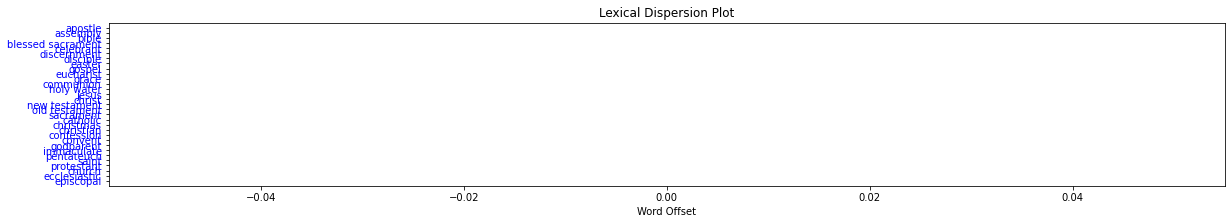

Jewish Words


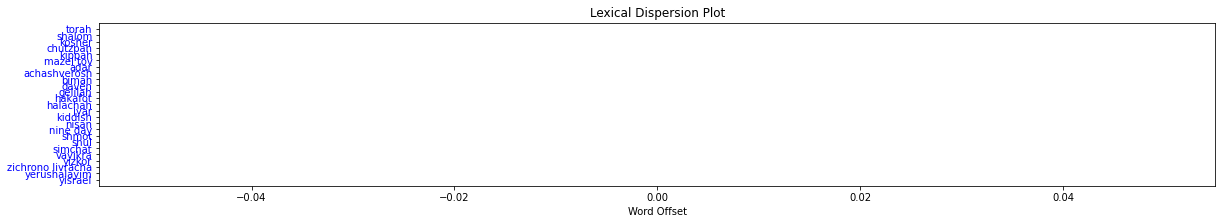

Budism Words


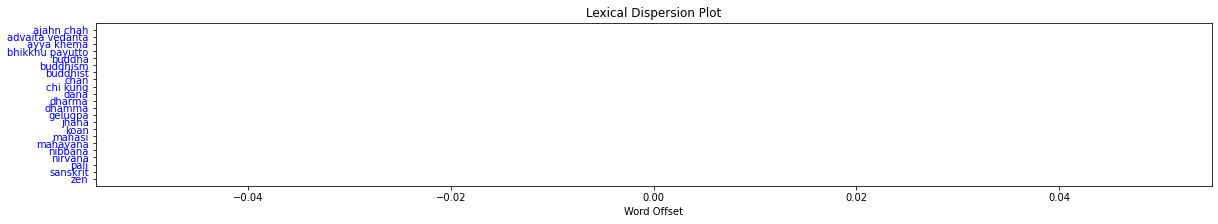

In [578]:
dispersion_tweets(get_posts_csv("muftimenk"), get_results("muftimenk"))